# **Correlation Matrix**

With this, we are going to get a visual correlation matrix PNG output like this:

![title](images/correlationMatrix.png)

First, we import all required libraries and packages:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we load our data file. It it is a .TXT file we'll use:

In [4]:
filename='dataCorrelationMatrix.txt'
data = pd.read_table(filename)
data

,Variety,Vigour,NFruits,Seeds,SepalLength,PetalLength,Brix_Day1,Brix_Day2,Brix_Day3,Acidity,FruitWeight,LeafWeight,Yield
0,Variety1,1,25,5,10,0,15,21.2,20.0,33.333333,66.666667,111.92,2798.00
1,Variety1,2,24,4,8,0,13,22.4,23.6,30.769231,61.538462,78.17,1797.91
2,Variety1,1,24,4,10,0,14,21.8,25.0,28.571429,71.428571,90.55,2082.65
3,Variety1,1,16,8,4,0,12,21.2,23.2,66.666667,33.333333,83.97,1343.52
4,Variety1,1,22,6,8,0,14,20.4,23.4,42.857143,57.142857,120.95,2660.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Variety2,1,9,5,2,0,7,14.2,15.0,71.428571,28.571429,301.27,3615.24
106,Variety2,1,9,7,1,0,8,16.8,17.2,87.500000,12.500000,553.07,4977.63
107,Variety2,1,14,12,1,0,13,19.2,21.2,92.307692,7.692308,436.88,5679.44
108,Variety2,1,13,13,0,0,13,17.4,16.4,100.000000,0.000000,336.64,4376.32


If our data file type is other, we can use:

### Correlation Matrix for all our raw data

If we just want to get the correlation matrix for all data included in data file, we'll use this function:

In [3]:
def simpleCorrelationMatrix(data):
    corrmat = data.corr()
    f, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(corrmat, vmax=.8,annot=True,linewidths=.5,fmt=".2f",annot_kws={"fontsize":12})
    sns.set(font_scale=1.33)
    plt.title('Correlation Matrix',fontsize=22,weight='bold')
    plt.savefig('correlationMatrix.png',dpi=100,transparent=True)
    plt.show()

Now we run it:

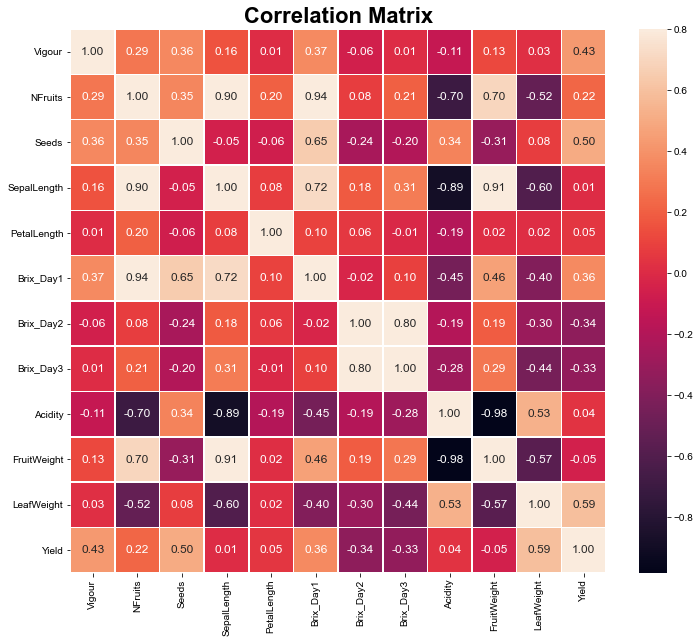

In [4]:
simpleCorrelationMatrix(data)

Now we have the PNG file output saved.

### Correlation matrix for data grouped by variety or genotype

If we want to get correlation matrix with means of data grouped by varieties, genotypes or other parameter:

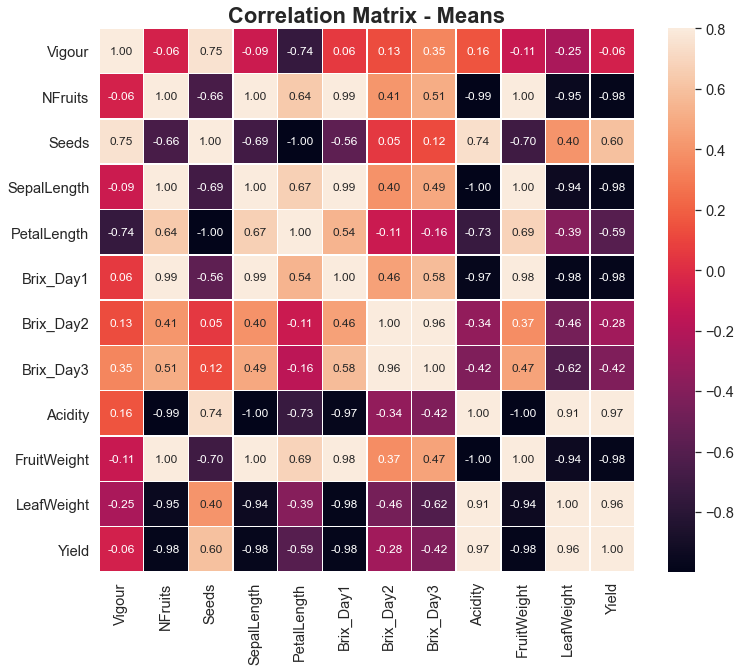

In [15]:
def correlationMatrix_varietyMeans(data,varietyColumnName):
    df=data.copy()
    dfMeans=df.groupby(varietyColumnName).mean()
    corrmat = dfMeans.corr()
    f, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(corrmat, vmax=.8,annot=True,linewidths=.5,fmt=".2f",annot_kws={"fontsize":12})
    sns.set(font_scale=1.33)
    plt.title('Correlation Matrix - Means',fontsize=22,weight='bold')
    plt.savefig('correlationMatrix_varietyMeans.png',dpi=100,transparent=True)
    plt.show()

correlationMatrix_varietyMeans(data,varietyColumnName='Variety')

### Correlation matrix for each variety or genotype

If we want to get the correlation matrix for each variety or genotype:

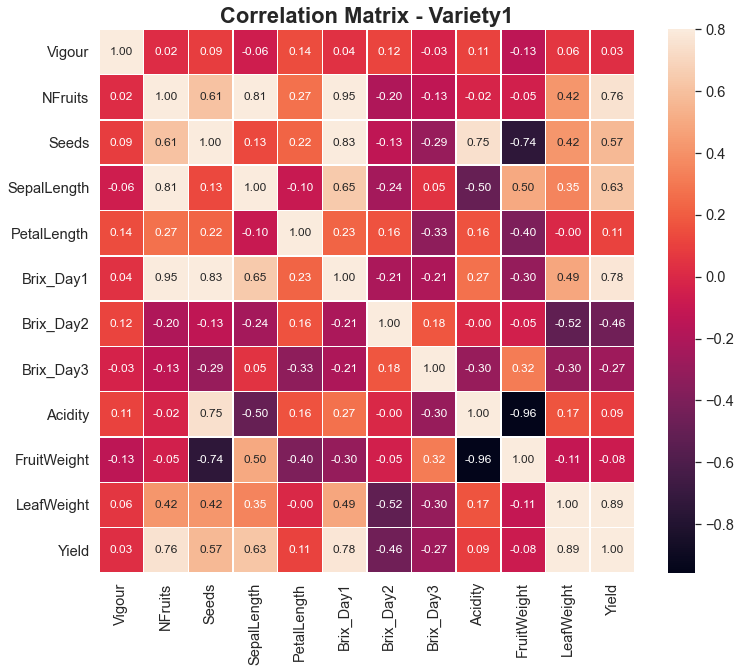

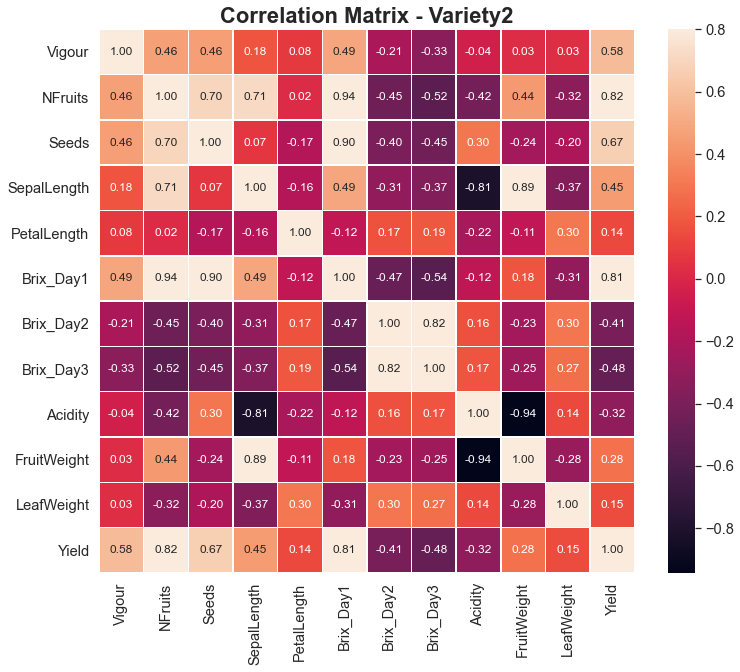

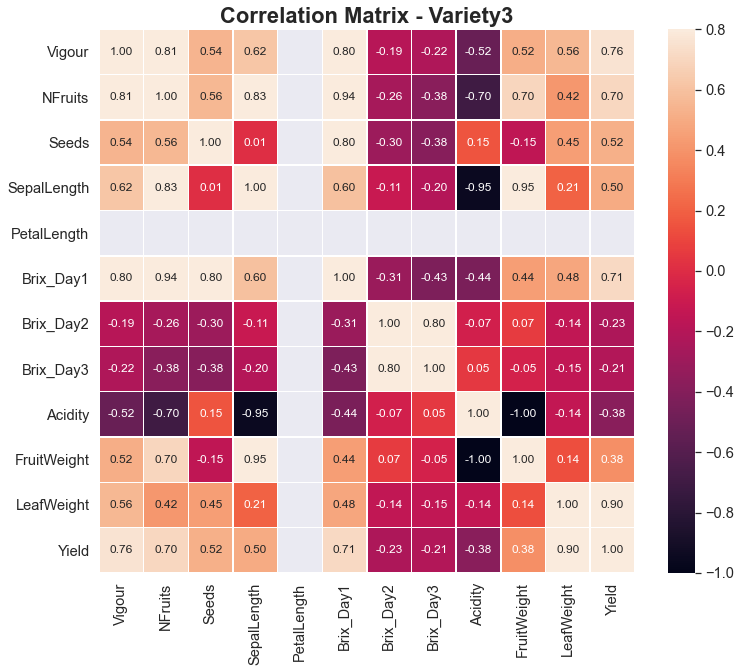

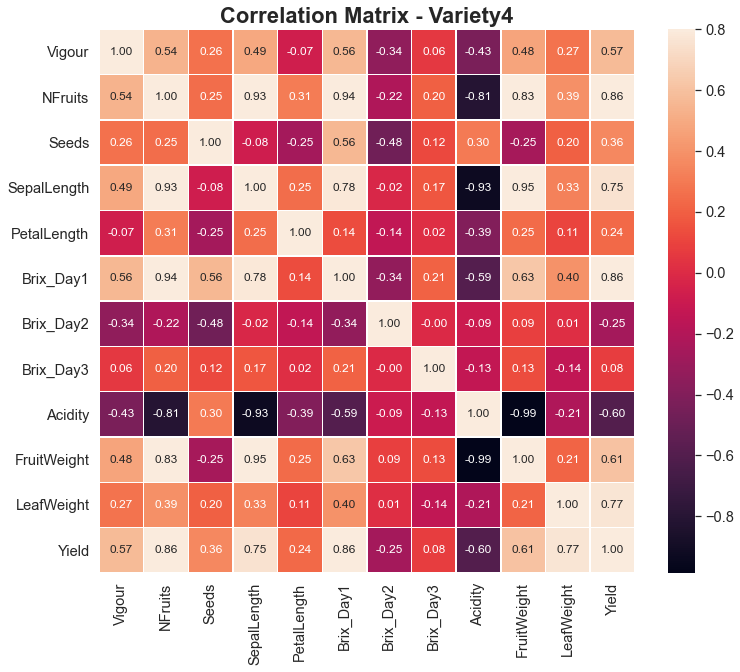

In [14]:
def correlationMatrix_perVariety(data,varietyColumnName):
    df=data.copy()
    varieties=df[varietyColumnName].unique().tolist()
    for variety in varieties:
        dfVariety=df[df[varietyColumnName]==variety]
        corrmat = dfVariety.corr()
        f, ax = plt.subplots(figsize=(12,10))
        sns.heatmap(corrmat, vmax=.8,annot=True,linewidths=.5,fmt=".2f",annot_kws={"fontsize":12})
        sns.set(font_scale=1.33)
        plt.title('Correlation Matrix - {}'.format(variety),fontsize=22,weight='bold')
        plt.savefig('correlationMatrix_{}.png'.format(variety),dpi=100,transparent=True)
        plt.show()
correlationMatrix_perVariety(data,varietyColumnName='Variety')

As we can see in correlation matrix for Variety3, if there's no variability in data the output is an empty box.